In [36]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline
plt.style.use('ggplot')

In [47]:
first_capdelay = None
first_quota    = None

df = pd.DataFrame(columns=('nclients', 'capdelay', 'quota', 'nops', 'avglat'))

results = glob.glob("seq-client.nc-*.cd-*.qa-*.*.*")
for filename in results:
    m = re.match("seq-client.nc-(?P<nc>\d+).cd-(?P<cd>\d+.\d+).qa-(?P<qa>\d+).(?P<ts>\d+).(?P<pid>\d+)", filename)
    nclients = int(m.group("nc"))
    capdelay = float(m.group("cd"))
    quota    = int(m.group("qa"))
    pid      = int(m.group("pid"))
    tstamp   = int(m.group("ts"))
    
    if first_capdelay is None:
        first_capdelay = capdelay
    if first_quota is None:
        first_quota = quota
    assert capdelay == first_capdelay
    assert quota == first_quota
    
    f = open(filename)
    nops = int(float(f.readline().strip()))
    alat = int(float(f.readline().strip()))
    
    tmp = pd.DataFrame({
            'nclients': [nclients],
            'capdelay': [capdelay],
            'quota':    [quota],
            'nops':     [nops],
            'avglat':   [alat]})
    df = df.append(tmp)
    
    print filename, nclients, capdelay, quota, pid, tstamp, nops, alat
    
df

seq-client.nc-1.cd-0.0.qa-0.1476729159.24062 1 0.0 0 24062 1476729159 2579200 345
seq-client.nc-16.cd-0.0.qa-0.1476729286.24336 16 0.0 0 24336 1476729286 17482 57409
seq-client.nc-16.cd-0.0.qa-0.1476729286.24337 16 0.0 0 24337 1476729286 11102 90393
seq-client.nc-16.cd-0.0.qa-0.1476729286.24338 16 0.0 0 24338 1476729286 4800 209115
seq-client.nc-16.cd-0.0.qa-0.1476729286.24339 16 0.0 0 24339 1476729286 7581 132333
seq-client.nc-16.cd-0.0.qa-0.1476729286.24340 16 0.0 0 24340 1476729286 37173 26991
seq-client.nc-16.cd-0.0.qa-0.1476729286.24343 16 0.0 0 24343 1476729286 20128 49859
seq-client.nc-16.cd-0.0.qa-0.1476729286.24344 16 0.0 0 24344 1476729286 5290 188733
seq-client.nc-16.cd-0.0.qa-0.1476729286.24345 16 0.0 0 24345 1476729286 30900 32473
seq-client.nc-16.cd-0.0.qa-0.1476729286.24346 16 0.0 0 24346 1476729286 50388 19909
seq-client.nc-16.cd-0.0.qa-0.1476729286.24348 16 0.0 0 24348 1476729286 47207 21251
seq-client.nc-16.cd-0.0.qa-0.1476729286.24349 16 0.0 0 24349 1476729286 14354 

,avglat,capdelay,nclients,nops,quota
0,345.0,0.0,1.0,2579200.0,0.0
0,57409.0,0.0,16.0,17482.0,0.0
0,90393.0,0.0,16.0,11102.0,0.0
0,209115.0,0.0,16.0,4800.0,0.0
0,132333.0,0.0,16.0,7581.0,0.0
0,26991.0,0.0,16.0,37173.0,0.0
0,49859.0,0.0,16.0,20128.0,0.0
0,188733.0,0.0,16.0,5290.0,0.0
0,32473.0,0.0,16.0,30900.0,0.0
0,19909.0,0.0,16.0,50388.0,0.0


              avglat  capdelay         nops  quota    sumnops
nclients                                                     
1.0         345.0000       0.0  2579200.000    0.0  2579200.0
2.0        7445.0000       0.0   148154.000    0.0   296308.0
4.0       14981.0000       0.0    92322.000    0.0   369288.0
8.0       35444.6250       0.0    52944.125    0.0   423553.0
16.0      65945.9375       0.0    26015.250    0.0   416244.0


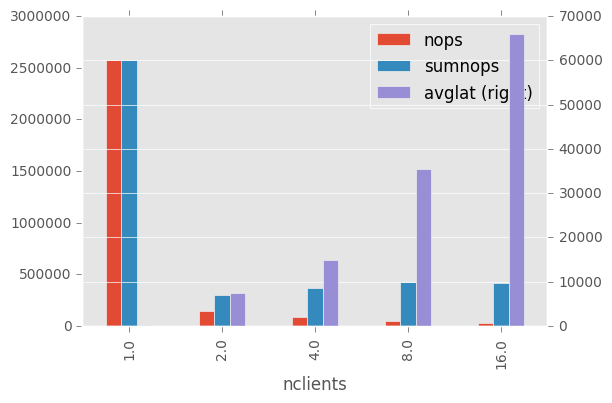

In [62]:
df2 = df.groupby('nclients').mean()
df2['sumnops'] = df.groupby('nclients').sum()['nops']
print df2
df2[['nops', 'sumnops', 'avglat']].plot.bar(secondary_y=['avglat'])